## Importing libraries and exploring data

In [1077]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1078]:
df=pd.read_csv('E:\\Epsilon\\22-session\\01-code\\data\\RTA Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [1079]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## changing time feature to time series and creating new features

In [1080]:
df['Time']=pd.to_datetime(df['Time'])

In [1081]:
df['year']=df['Time'].dt.year
df['month']=df['Time'].dt.month
df['hour']=df['Time'].dt.hour

In [1082]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,year,month,hour
0,2022-10-07 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2022,10,17
1,2022-10-07 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,17
2,2022-10-07 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2022,10,17
3,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2022,10,1
4,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,1


In [1083]:
def day_period(hours):
    if hours in range (6,14):
        return 'morning'
    elif hours in range (14,22):
        return 'afternoon'
    else :
        return 'evening'

df['day_period']=df['hour'].apply(day_period)    
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,year,month,hour,day_period
0,2022-10-07 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2022,10,17,afternoon
1,2022-10-07 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,17,afternoon
2,2022-10-07 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2022,10,17,afternoon
3,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2022,10,1,evening
4,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,1,evening


## Analysis questions  (relations between every feature and accident severity ) ?
## How to decrease every type in accident severity ?

In [1084]:
df.groupby('day_period')['Accident_severity'].value_counts().sort_values(ascending=False)

day_period  Accident_severity
afternoon   Slight Injury        5363
morning     Slight Injury        4039
evening     Slight Injury        1013
afternoon   Serious Injury        876
morning     Serious Injury        623
evening     Serious Injury        244
afternoon   Fatal injury           92
morning     Fatal injury           37
evening     Fatal injury           29
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'maximum accidents per day')

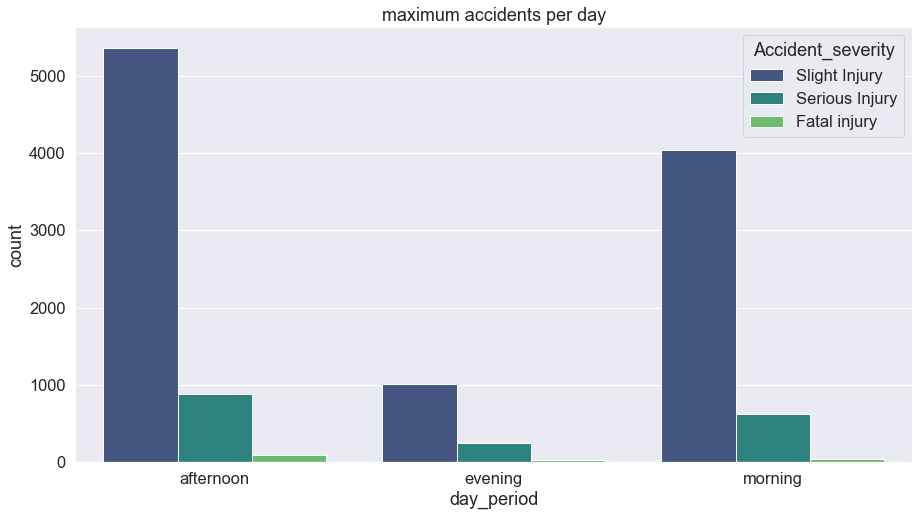

In [1085]:
sns.set(font_scale=1.5)
plt.figure(figsize=[15,8])
sns.countplot(x='day_period',hue='Accident_severity',data=df,palette='viridis')
plt.title('maximum accidents per day')

In [1086]:
df.groupby('Day_of_week')['Accident_severity'].value_counts().sort_values(ascending=False)


Day_of_week  Accident_severity
Friday       Slight Injury        1712
Wednesday    Slight Injury        1559
Thursday     Slight Injury        1557
Tuesday      Slight Injury        1496
Monday       Slight Injury        1465
Saturday     Slight Injury        1384
Sunday       Slight Injury        1242
Friday       Serious Injury        313
Thursday     Serious Injury        272
Wednesday    Serious Injury        262
Tuesday      Serious Injury        257
Saturday     Serious Injury        245
Monday       Serious Injury        204
Sunday       Serious Injury        190
Saturday     Fatal injury           37
Sunday       Fatal injury           35
Thursday     Fatal injury           22
Wednesday    Fatal injury           19
Tuesday      Fatal injury           17
Friday       Fatal injury           16
Monday       Fatal injury           12
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'maximum accidents type per week')

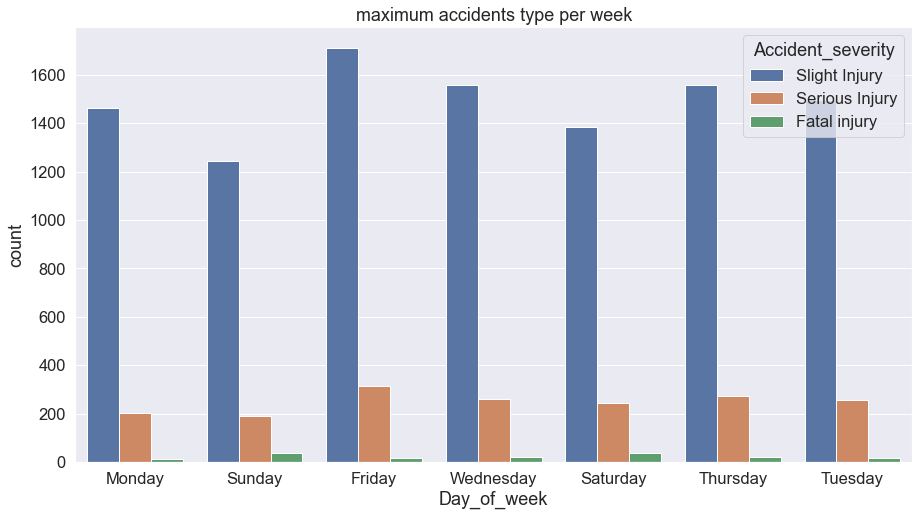

In [1087]:
sns.set(font_scale=1.5)
plt.figure(figsize=[15,8])
sns.countplot(x='Day_of_week',hue='Accident_severity',data=df)
plt.title('maximum accidents type per week')

In [1088]:
df.groupby('Age_band_of_driver')['Accident_severity'].value_counts().sort_values(ascending=False)


Age_band_of_driver  Accident_severity
18-30               Slight Injury        3605
31-50               Slight Injury        3492
Unknown             Slight Injury        1370
Over 51             Slight Injury        1304
Under 18            Slight Injury         644
18-30               Serious Injury        604
31-50               Serious Injury        541
Over 51             Serious Injury        257
Unknown             Serious Injury        172
Under 18            Serious Injury        169
18-30               Fatal injury           62
31-50               Fatal injury           54
Over 51             Fatal injury           24
Under 18            Fatal injury           12
Unknown             Fatal injury            6
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'Age of driver')

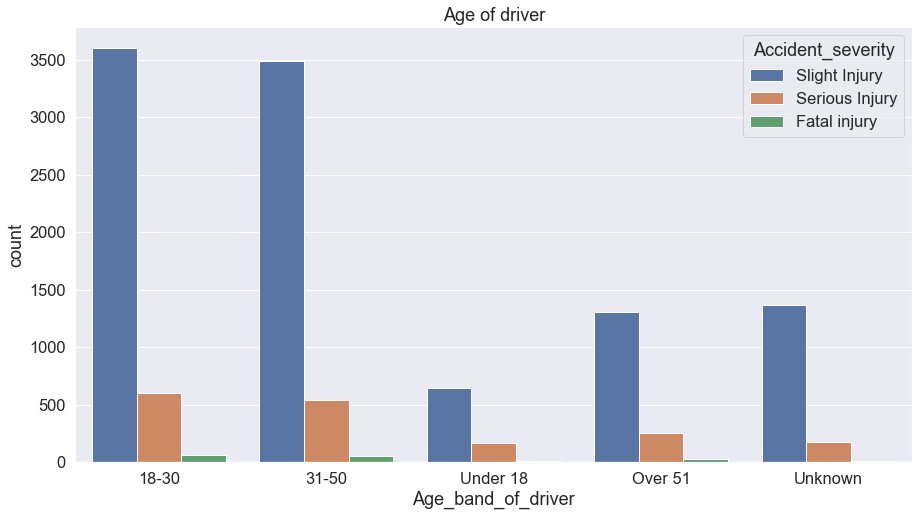

In [1089]:
sns.set(font_scale=1.5)
plt.figure(figsize=[15,8])
sns.countplot(x='Age_band_of_driver',hue='Accident_severity',data=df)
plt.title('Age of driver')

In [1090]:
df.groupby('Service_year_of_vehicle')['Accident_severity'].value_counts().sort_values(ascending=False)

Service_year_of_vehicle  Accident_severity
Unknown                  Slight Injury        2431
2-5yrs                   Slight Injury        1511
Above 10yr               Slight Injury        1126
5-10yrs                  Slight Injury        1073
1-2yr                    Slight Injury         707
Unknown                  Serious Injury        408
2-5yrs                   Serious Injury        253
Below 1yr                Slight Injury         233
5-10yrs                  Serious Injury        191
Above 10yr               Serious Injury        186
1-2yr                    Serious Injury        111
Unknown                  Fatal injury           44
Below 1yr                Serious Injury         43
2-5yrs                   Fatal injury           28
5-10yrs                  Fatal injury           16
Above 10yr               Fatal injury           12
1-2yr                    Fatal injury            9
Below 1yr                Fatal injury            6
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'Service of car')

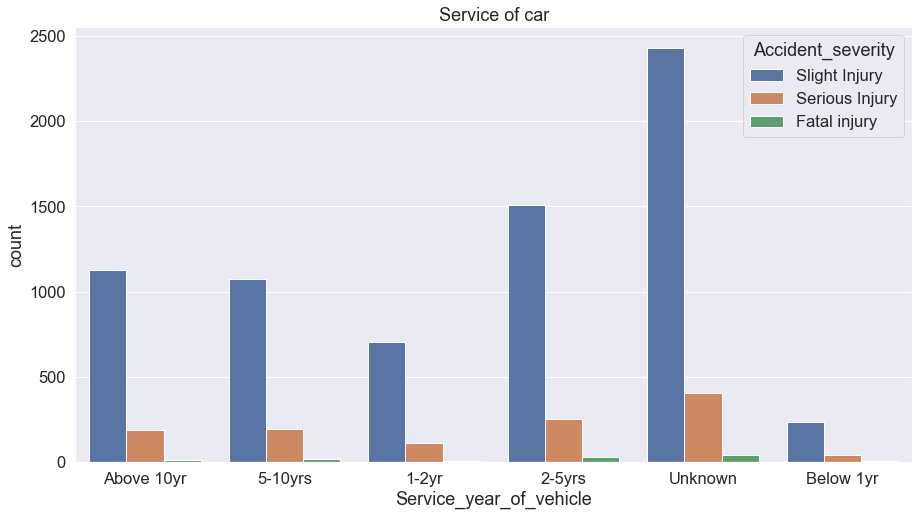

In [1091]:
sns.set(font_scale=1.5)
plt.figure(figsize=[15,8])
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Service of car')

In [1092]:
df.groupby('Type_of_vehicle')['Accident_severity'].value_counts().sort_values(ascending=False)

Type_of_vehicle       Accident_severity
Automobile            Slight Injury        2693
Lorry (41?100Q)       Slight Injury        1880
Other                 Slight Injury        1054
Pick up upto 10Q      Slight Injury         664
Public (12 seats)     Slight Injury         607
Stationwagen          Slight Injury         580
Automobile            Serious Injury        472
Public (13?45 seats)  Slight Injury         437
Lorry (11?40Q)        Slight Injury         435
Public (> 45 seats)   Slight Injury         347
Long lorry            Slight Injury         312
Lorry (41?100Q)       Serious Injury        280
Taxi                  Slight Injury         223
Motorcycle            Slight Injury         145
Other                 Serious Injury        138
Pick up upto 10Q      Serious Injury        132
Lorry (11?40Q)        Serious Injury         99
Stationwagen          Serious Injury         99
Public (12 seats)     Serious Injury         95
Public (13?45 seats)  Serious Injury         84


[Text(0, 0, 'Automobile'),
 Text(1, 0, 'Public (> 45 seats)'),
 Text(2, 0, 'Lorry (41?100Q)'),
 Text(3, 0, 'Public (13?45 seats)'),
 Text(4, 0, 'Lorry (11?40Q)'),
 Text(5, 0, 'Long lorry'),
 Text(6, 0, 'Public (12 seats)'),
 Text(7, 0, 'Taxi'),
 Text(8, 0, 'Pick up upto 10Q'),
 Text(9, 0, 'Stationwagen'),
 Text(10, 0, 'Ridden horse'),
 Text(11, 0, 'Other'),
 Text(12, 0, 'Bajaj'),
 Text(13, 0, 'Turbo'),
 Text(14, 0, 'Motorcycle'),
 Text(15, 0, 'Special vehicle'),
 Text(16, 0, 'Bicycle')]

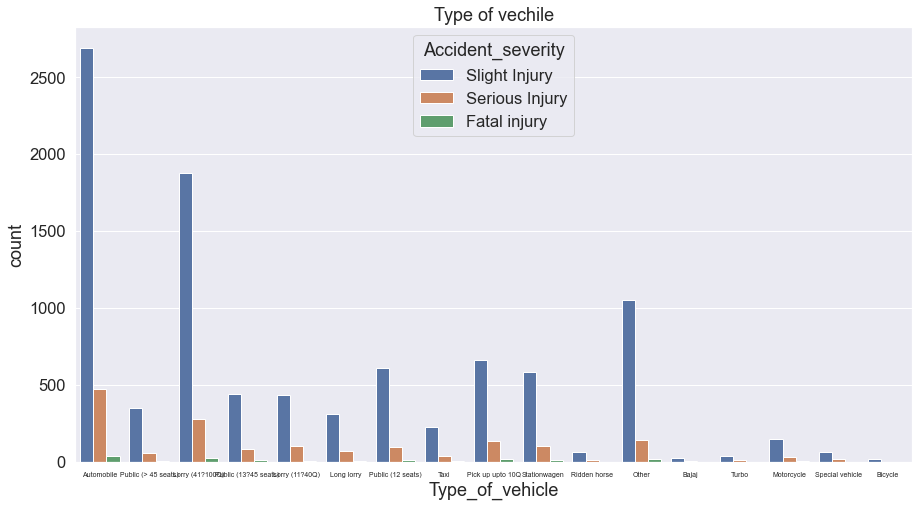

In [1093]:
plt.figure(figsize=[15,8])
b=sns.countplot(x='Type_of_vehicle',hue='Accident_severity',data=df)
plt.title('Type of vechile')
b.set_xticklabels(b.get_xmajorticklabels(), size = 7)

In [1094]:
df.groupby('Light_conditions')['Accident_severity'].value_counts().sort_values(ascending=False)

Light_conditions         Accident_severity
Daylight                 Slight Injury        7489
Darkness - lights lit    Slight Injury        2755
Daylight                 Serious Injury       1222
Darkness - lights lit    Serious Injury        465
Darkness - no lighting   Slight Injury         138
Daylight                 Fatal injury           87
Darkness - lights lit    Fatal injury           66
Darkness - no lighting   Serious Injury         49
Darkness - lights unlit  Slight Injury          33
                         Serious Injury          7
Darkness - no lighting   Fatal injury            5
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'light conditions')

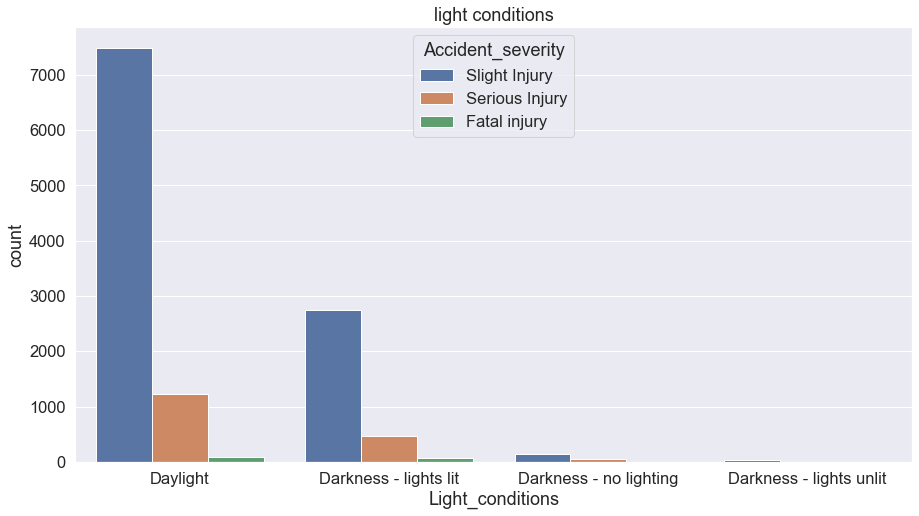

In [1095]:
sns.set(font_scale=1.5)
plt.figure(figsize=[15,8])
sns.countplot(x='Light_conditions',hue='Accident_severity',data=df)
plt.title('light conditions')

In [1096]:
### lightining is not effecting

In [1097]:
df.groupby('Weather_conditions')['Accident_severity'].value_counts().sort_values(ascending=False)

Weather_conditions  Accident_severity
Normal              Slight Injury        8454
                    Serious Injury       1474
Raining             Slight Injury        1150
Other               Slight Injury         268
Unknown             Slight Injury         241
Raining             Serious Injury        158
Normal              Fatal injury          135
Cloudy              Slight Injury         117
Windy               Slight Injury          82
Snow                Slight Injury          56
Unknown             Serious Injury         51
Raining and Windy   Slight Injury          38
Other               Serious Injury         28
Raining             Fatal injury           23
Windy               Serious Injury         16
Fog or mist         Slight Injury           9
Cloudy              Serious Injury          8
Snow                Serious Injury          5
Raining and Windy   Serious Injury          2
Fog or mist         Serious Injury          1
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'light conditions')

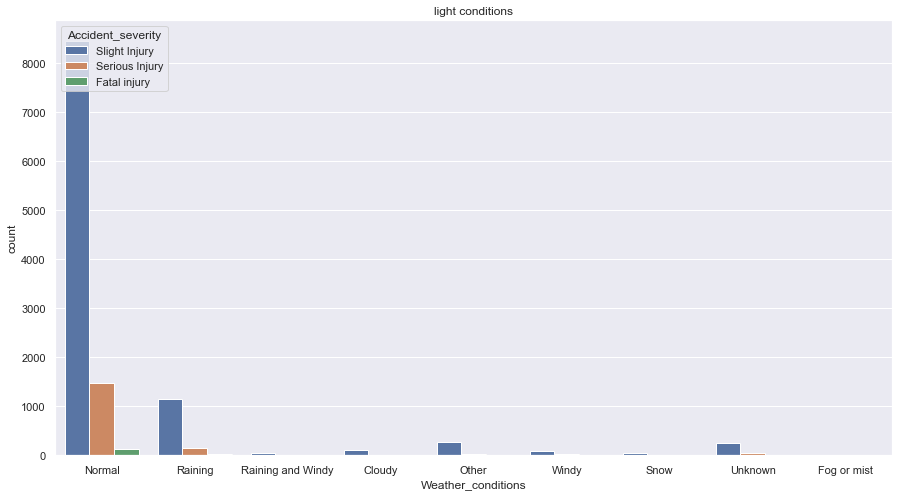

In [1098]:
sns.set(font_scale=1)
plt.figure(figsize=[15,8])
sns.countplot(x='Weather_conditions',hue='Accident_severity',data=df)
plt.title('light conditions')

In [1099]:
### weather is not effecting

In [1100]:
df.groupby('Road_surface_type')['Accident_severity'].value_counts().sort_values(ascending=False)

Road_surface_type                 Accident_severity
Asphalt roads                     Slight Injury        9555
                                  Serious Injury       1593
Earth roads                       Slight Injury         302
Gravel roads                      Slight Injury         197
Asphalt roads                     Fatal injury          148
Other                             Slight Injury         140
Asphalt roads with some distress  Slight Injury          73
Earth roads                       Serious Injury         49
Gravel roads                      Serious Injury         45
Other                             Serious Injury         26
Asphalt roads with some distress  Serious Injury          7
Earth roads                       Fatal injury            7
Asphalt roads with some distress  Fatal injury            1
Other                             Fatal injury            1
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'Road_surface_type')

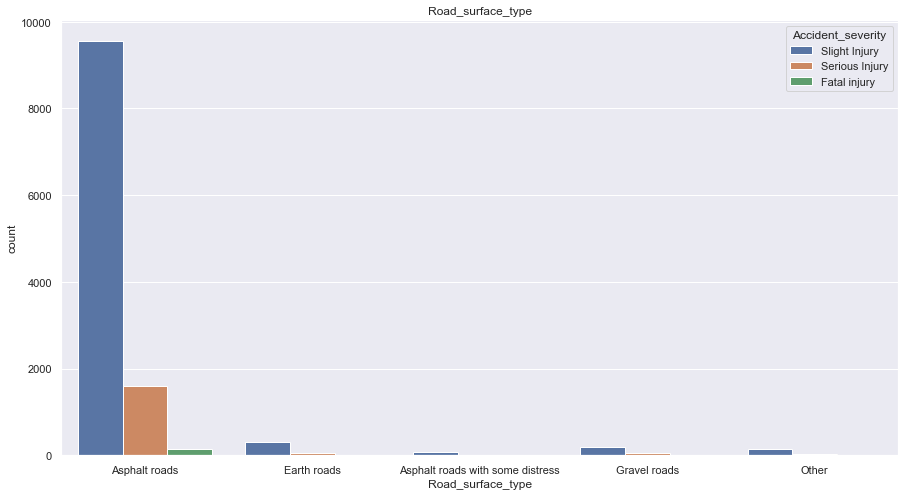

In [1101]:
sns.set(font_scale=1)
plt.figure(figsize=[15,8])
sns.countplot(x='Road_surface_type',hue='Accident_severity',data=df)
plt.title('Road_surface_type')

In [1102]:
df.groupby('Cause_of_accident')['Accident_severity'].value_counts().sort_values(ascending=False)

Cause_of_accident                     Accident_severity
No distancing                         Slight Injury        1940
Changing lane to the right            Slight Injury        1525
Changing lane to the left             Slight Injury        1251
Driving carelessly                    Slight Injury        1171
No priority to vehicle                Slight Injury        1045
Moving Backward                       Slight Injury         949
No priority to pedestrian             Slight Injury         621
Other                                 Slight Injury         385
Overtaking                            Slight Injury         351
No distancing                         Serious Injury        303
Driving under the influence of drugs  Slight Injury         289
Changing lane to the right            Serious Injury        260
Driving to the left                   Slight Injury         227
Driving carelessly                    Serious Injury        209
Changing lane to the left             Serious In

[Text(0, 0, 'Moving Backward'),
 Text(1, 0, 'Overtaking'),
 Text(2, 0, 'Changing lane to the left'),
 Text(3, 0, 'Changing lane to the right'),
 Text(4, 0, 'Overloading'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'No priority to vehicle'),
 Text(7, 0, 'No priority to pedestrian'),
 Text(8, 0, 'No distancing'),
 Text(9, 0, 'Getting off the vehicle improperly'),
 Text(10, 0, 'Improper parking'),
 Text(11, 0, 'Overspeed'),
 Text(12, 0, 'Driving carelessly'),
 Text(13, 0, 'Driving at high speed'),
 Text(14, 0, 'Driving to the left'),
 Text(15, 0, 'Unknown'),
 Text(16, 0, 'Overturning'),
 Text(17, 0, 'Turnover'),
 Text(18, 0, 'Driving under the influence of drugs'),
 Text(19, 0, 'Drunk driving')]

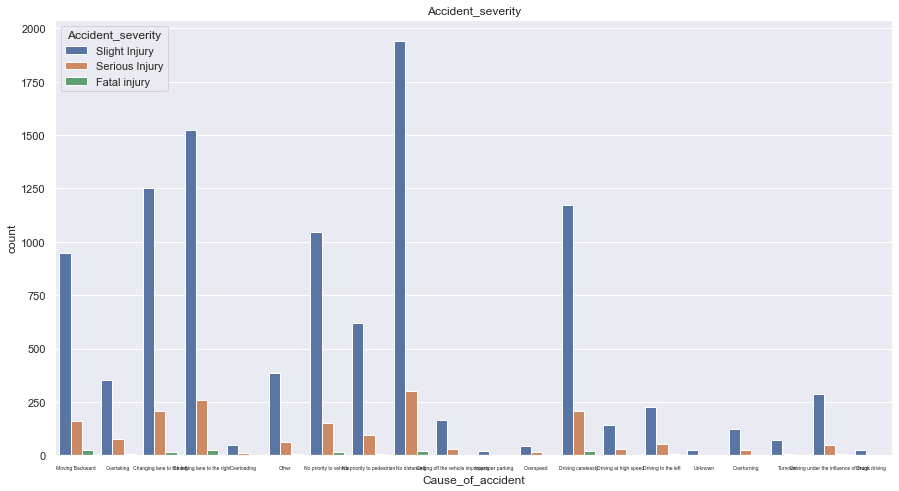

In [1103]:
plt.figure(figsize=[15,8])
b=sns.countplot(x='Cause_of_accident',hue='Accident_severity',data=df)
plt.title('Accident_severity')
b.set_xticklabels(b.get_xmajorticklabels(), size = 5)

In [1104]:
df.groupby('Road_surface_conditions')['Accident_severity'].value_counts().sort_values(ascending=False)

Road_surface_conditions  Accident_severity
Dry                      Slight Injury        7887
Wet or damp              Slight Injury        2460
Dry                      Serious Injury       1332
Wet or damp              Serious Injury        407
Dry                      Fatal injury          121
Snow                     Slight Injury          66
Wet or damp              Fatal injury           37
Snow                     Serious Injury          4
Flood over 3cm. deep     Slight Injury           2
Name: Accident_severity, dtype: int64

[Text(0, 0, 'Dry'),
 Text(1, 0, 'Wet or damp'),
 Text(2, 0, 'Snow'),
 Text(3, 0, 'Flood over 3cm. deep')]

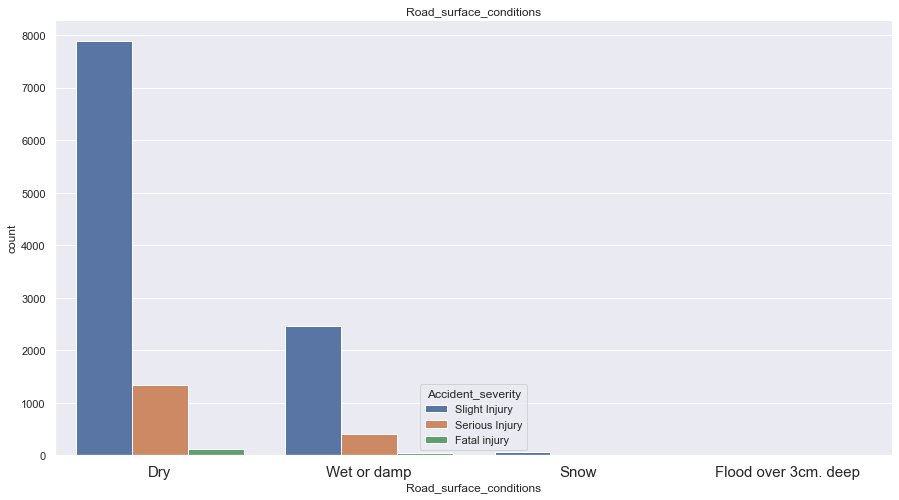

In [1105]:
plt.figure(figsize=[15,8])
b=sns.countplot(x='Road_surface_conditions',hue='Accident_severity',data=df)
plt.title('Road_surface_conditions')
b.set_xticklabels(b.get_xmajorticklabels(), size = 15)

In [1106]:
df['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [1107]:
df['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [1108]:
df['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [1109]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,year,month,hour,day_period
0,2022-10-07 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2022,10,17,afternoon
1,2022-10-07 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,17,afternoon
2,2022-10-07 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2022,10,17,afternoon
3,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2022,10,1,evening
4,2022-10-07 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,10,1,evening


In [1110]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [1111]:
df.groupby('Vehicle_movement')['Accident_severity'].value_counts().sort_values(ascending=False)

Vehicle_movement     Accident_severity
Going straight       Slight Injury        6922
                     Serious Injury       1137
Moving Backward      Slight Injury         831
Other                Slight Injury         797
Reversing            Slight Injury         469
Turnover             Slight Injury         405
Getting off          Slight Injury         290
Entering a junction  Slight Injury         163
Moving Backward      Serious Injury        142
Other                Serious Injury        130
Going straight       Fatal injury           99
Reversing            Serious Injury         87
Overtaking           Slight Injury          83
Turnover             Serious Injury         77
Unknown              Slight Injury          74
Stopping             Slight Injury          50
Getting off          Serious Injury         44
U-Turn               Slight Injury          41
Waiting to go        Slight Injury          34
Entering a junction  Serious Injury         26
Unknown              

In [1112]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [1113]:
df['Casualty_severity'].unique()

array(['na', '3', '2', '1'], dtype=object)

In [1114]:
df['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Blind             18
Other             18
Name: Fitness_of_casuality, dtype: int64

In [1115]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [1116]:
df.groupby('Pedestrian_movement')['Accident_severity'].value_counts().sort_values(ascending=False)

Pedestrian_movement                                                                                                                    Accident_severity
Not a Pedestrian                                                                                                                       Slight Injury        9642
                                                                                                                                       Serious Injury       1606
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                          Slight Injury         279
Unknown or other                                                                                                                       Slight Injury         246
Not a Pedestrian                                                                                                                       Fatal injury          142
Crossing from driver's nearside           

In [1117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [1118]:
# important Educational_level

In [1119]:
df.groupby('Types_of_Junction')['Accident_severity'].value_counts().sort_values(ascending=False)

Types_of_Junction  Accident_severity
Y Shape            Slight Injury        3857
No junction        Slight Injury        3185
Crossing           Slight Injury        1920
Y Shape            Serious Injury        633
No junction        Serious Injury        581
Other              Slight Injury         360
Crossing           Serious Injury        245
Unknown            Slight Injury         163
O Shape            Slight Injury         137
Other              Serious Injury         83
No junction        Fatal injury           71
T Shape            Slight Injury          53
Y Shape            Fatal injury           53
O Shape            Serious Injury         26
Unknown            Serious Injury         26
X Shape            Slight Injury          12
Crossing           Fatal injury           12
T Shape            Serious Injury          7
Other              Fatal injury            2
Unknown            Fatal injury            2
O Shape            Fatal injury            1
Name: Accident_sev

[Text(0, 0, 'No junction'),
 Text(1, 0, 'Y Shape'),
 Text(2, 0, 'Crossing'),
 Text(3, 0, 'O Shape'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'Unknown'),
 Text(6, 0, 'T Shape'),
 Text(7, 0, 'X Shape')]

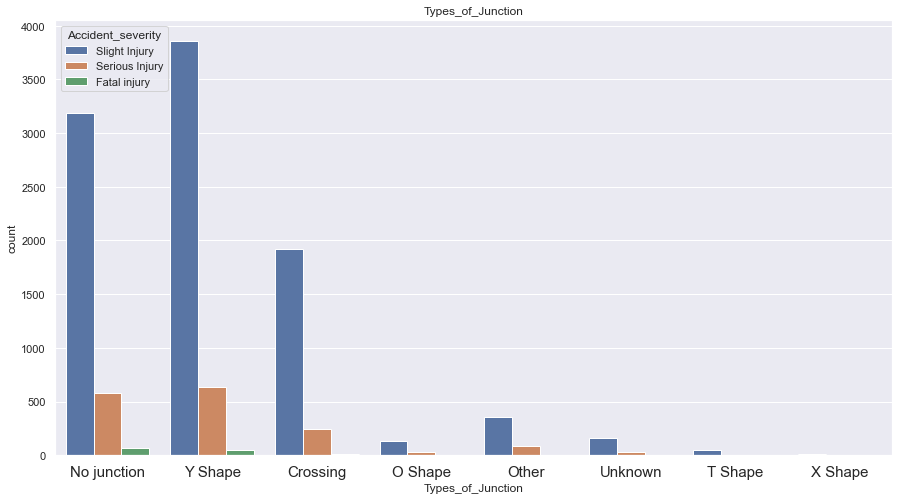

In [1120]:
plt.figure(figsize=[15,8])
b=sns.countplot(x='Types_of_Junction',hue='Accident_severity',data=df)
plt.title('Types_of_Junction')
b.set_xticklabels(b.get_xmajorticklabels(), size = 15)

In [1121]:
df.groupby('Type_of_collision')['Accident_severity'].value_counts().sort_values(ascending=False)

Type_of_collision                        Accident_severity
Vehicle with vehicle collision           Slight Injury        7467
Collision with roadside objects          Slight Injury        1490
Vehicle with vehicle collision           Serious Injury       1203
Collision with pedestrians               Slight Injury         733
Rollover                                 Slight Injury         339
Collision with roadside objects          Serious Injury        272
Collision with animals                   Slight Injury         142
Collision with pedestrians               Serious Injury        141
Vehicle with vehicle collision           Fatal injury          104
Rollover                                 Serious Injury         54
Collision with roadside-parked vehicles  Slight Injury          49
Fall from vehicles                       Slight Injury          30
Collision with animals                   Serious Injury         27
Collision with roadside objects          Fatal injury           24
Oth

In [1122]:
df.groupby('Educational_level')['Accident_severity'].value_counts().sort_values(ascending=False)

Educational_level   Accident_severity
Junior high school  Slight Injury        6439
Elementary school   Slight Injury        1825
Junior high school  Serious Injury       1083
High school         Slight Injury         949
Elementary school   Serious Injury        314
Above high school   Slight Injury         304
Writing & reading   Slight Injury         151
High school         Serious Injury        146
Junior high school  Fatal injury           97
Unknown             Slight Injury          80
Above high school   Serious Injury         53
Illiterate          Slight Injury          39
Elementary school   Fatal injury           24
Writing & reading   Serious Injury         22
Unknown             Serious Injury         20
High school         Fatal injury           15
Illiterate          Serious Injury          6
Above high school   Fatal injury            5
Writing & reading   Fatal injury            3
Name: Accident_severity, dtype: int64

In [1123]:
for i in df.columns :
    print (i)
    print(df[i].unique())

Time
['2022-10-07T17:02:00.000000000' '2022-10-07T01:06:00.000000000'
 '2022-10-07T14:15:00.000000000' ... '2022-10-07T07:24:00.000000000'
 '2022-10-07T19:18:00.000000000' '2022-10-07T02:47:00.000000000']
Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver
['Male' 'Female' 'Unknown']
Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle
['

## Cleaning data and handle missing values

In [1124]:
df.drop(['Time'],inplace=True,axis=1)

In [1125]:
df['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [1126]:
mode = df['Age_band_of_driver'].mode()[0]
df['Age_band_of_driver']=df['Age_band_of_driver'].replace('Unknown',mode)
df['Age_band_of_driver'].value_counts()

18-30       5819
31-50       4087
Over 51     1585
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [1127]:
mode = df['Sex_of_driver'].mode()[0]
df['Sex_of_driver']=df['Sex_of_driver'].replace('Unknown',mode)
df['Sex_of_driver'].value_counts()

Male      11615
Female      701
Name: Sex_of_driver, dtype: int64

In [1128]:
mode = df['Educational_level'].mode()[0]
df['Educational_level']=df['Educational_level'].replace('Unknown',mode)
df['Educational_level'].value_counts()

Junior high school    7719
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: Educational_level, dtype: int64

In [1129]:
df['Educational_level'].fillna(mode,inplace=True)


In [1130]:
df['Vehicle_driver_relation'].value_counts()

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [1131]:
df['Vehicle_driver_relation'].value_counts()

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [1132]:
df.drop(['Vehicle_driver_relation'],axis=1,inplace=True)

In [1133]:
mode = df['Driving_experience'].mode()[0]
df['Driving_experience']=df['Driving_experience'].replace('unknown',mode)
df['Driving_experience'].value_counts()

5-10yr        3396
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
Name: Driving_experience, dtype: int64

In [1134]:
df['Driving_experience'].fillna(mode,inplace=True)

In [1135]:
mode = df['Type_of_vehicle'].mode()[0]
df['Type_of_vehicle']=df['Type_of_vehicle'].replace('unknown',mode)
df['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [1136]:
df['Type_of_vehicle'].fillna(mode,inplace=True)

In [1137]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [1138]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [1139]:
df.drop(['Owner_of_vehicle'],inplace=True, axis=1)

In [1140]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('Unknown','5-10yrs')
df['Service_year_of_vehicle'].value_counts()

5-10yrs       4163
2-5yrs        1792
Above 10yr    1324
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [1141]:
df['Service_year_of_vehicle'].fillna(mode,inplace=True)

In [1142]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [1143]:
df['Defect_of_vehicle'].mode()

0    No defect
dtype: object

In [1144]:
df['Defect_of_vehicle'].fillna('No defect',inplace=True)

In [1145]:
df['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [1146]:
df['Area_accident_occured'].fillna('Other',inplace=True)

In [1147]:
df['Area_accident_occured']=df['Area_accident_occured'].replace('Unknown','Office areas')

In [1148]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [1149]:
df['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: Lanes_or_Medians, dtype: int64

In [1150]:
df['Lanes_or_Medians']=df['Lanes_or_Medians'].replace('Unknown','Two-way (divided with broken lines road marking)')
df['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)',inplace=True)

In [1151]:
df['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [1152]:
df['Road_allignment'].fillna('Road_allignment',inplace=True)

In [1153]:
df['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [1154]:
df['Types_of_Junction']=df['Types_of_Junction'].replace('Unknown','Y Shape')
df['Types_of_Junction'].fillna('Y Shape',inplace=True)

In [1155]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [1156]:
df['Type_of_collision']=df['Type_of_collision'].replace('Unknown','Vehicle with vehicle collision')
df['Type_of_collision'].fillna('Vehicle with vehicle collision',inplace=True)

In [1157]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [1158]:
df.drop('Road_surface_type',axis=1,inplace=True) ## is not important

In [1159]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [1160]:
df['Vehicle_movement'].mode()[0]

'Going straight'

In [1161]:
df['Vehicle_movement']=df['Vehicle_movement'].replace('Other','Going straight')
df['Vehicle_movement'].fillna('Going straight',inplace=True)

In [1162]:
df.drop(['Work_of_casuality','Fitness_of_casuality'],axis=1,inplace=True)

In [1163]:
df['Casualty_class'].mode()[0]

'Driver or rider'

In [1164]:
df['Sex_of_casualty'].mode()[0]

'Male'

In [1165]:
df['Casualty_severity'].mode()[0]

'3'

In [1166]:
df['Age_band_of_casualty'].mode()[0]

'na'

In [1167]:
df['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [1168]:
df.drop(['Age_band_of_casualty'],axis=1,inplace=True)

In [1169]:
df['Casualty_class'] = df['Casualty_class'].replace('na','Driver or rider')
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na','Male')
df['Casualty_severity'] = df['Casualty_severity'].replace('na','3')

In [1170]:
df.drop('Road_surface_conditions',axis=1,inplace=True) ## is not effecting
df.drop('Light_conditions',axis=1,inplace=True) ## is not effecting
df.drop('Weather_conditions',axis=1,inplace=True) ## is not effecting

In [1171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Driving_experience           12316 non-null  object
 5   Type_of_vehicle              12316 non-null  object
 6   Service_year_of_vehicle      12316 non-null  object
 7   Defect_of_vehicle            12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Lanes_or_Medians             12316 non-null  object
 10  Road_allignment              12316 non-null  object
 11  Types_of_Junction            12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Number_of_vehicles_involved  12

In [1172]:
for i in df.columns :
    print (i)
    print(df[i].unique())

Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51']
Sex_of_driver
['Male' 'Female']
Educational_level
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Service_year_of_vehicle
['Above 10yr' '5-10yrs' 'Automobile' '1-2yr' '2-5yrs' 'Below 1yr']
Defect_of_vehicle
['No defect' '7' '5']
Area_accident_occured
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'Scho

## Split Data to input and output data 

In [1173]:
x = df.drop('Accident_severity',axis= 1 )
y = df['Accident_severity']

In [1174]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

## Dealing with nominal Data


In [1175]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'year', 'month', 'hour',
       'day_period'],
      dtype='object')

In [1176]:
df['Casualty_severity'] = pd.to_numeric(df['Casualty_severity'])

In [1177]:
df['Casualty_class'].unique()

array(['Driver or rider', 'Pedestrian', 'Passenger'], dtype=object)

In [1178]:
col = ['Day_of_week','day_period','year','Age_band_of_driver','Sex_of_driver','Educational_level','Driving_experience'
       ,'Type_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians'
       ,'Road_allignment','Types_of_Junction','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty'
       ,'Pedestrian_movement','Cause_of_accident','Accident_severity',]

In [1179]:
x = pd.get_dummies(data= df , columns= col ,drop_first= True)

In [1180]:
x

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,month,hour,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,2,2,3,10,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,3,10,17,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,2,3,10,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,2,3,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,2,3,10,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,3,10,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12312,2,1,3,10,18,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12313,1,1,3,10,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
12314,2,1,3,10,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Split Data to train and test

In [1181]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y ,test_size=0.2,random_state=0,stratify=y)

In [1182]:
y_train.value_counts()

Slight Injury     8331
Serious Injury    1394
Fatal injury       127
Name: Accident_severity, dtype: int64

In [1183]:
y_test.value_counts()

Slight Injury     2084
Serious Injury     349
Fatal injury        31
Name: Accident_severity, dtype: int64

## Handle imbalanced data

In [1184]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [1185]:
x_train_smote , y_train_smote = smote.fit_resample (x_train,y_train)

In [1186]:
x_train_smote

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,month,hour,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,...,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,1,1,3,10,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,4,3,10,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2,3,10,15,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2,3,3,10,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,3,10,17,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24988,3,2,3,10,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24989,1,1,3,10,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24990,2,1,3,10,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24991,1,1,3,10,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1187]:
y_train_smote.value_counts()

Serious Injury    8331
Slight Injury     8331
Fatal injury      8331
Name: Accident_severity, dtype: int64